In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load employees dataset
df_colaboradores = pd.read_csv('../banvic/seeds/banvic/colaboradores.csv')
print(f"✅ Loaded {len(df_colaboradores):,} employee records")

# Convert date column with proper error handling
print("Converting date column...")
df_colaboradores['data_nascimento'] = pd.to_datetime(df_colaboradores['data_nascimento'], format='mixed', errors='coerce')

# Verify datetime conversion
print(f"data_nascimento dtype: {df_colaboradores['data_nascimento'].dtype}")
print(f"data_nascimento is datetime: {pd.api.types.is_datetime64_any_dtype(df_colaboradores['data_nascimento'])}")

# Make data_nascimento timezone-aware (assuming UTC if no timezone info)
if pd.api.types.is_datetime64_any_dtype(df_colaboradores['data_nascimento']):
    if df_colaboradores['data_nascimento'].dt.tz is None:
        df_colaboradores['data_nascimento'] = df_colaboradores['data_nascimento'].dt.tz_localize('UTC')
        print("✅ data_nascimento localized to UTC")
    else:
        df_colaboradores['data_nascimento'] = df_colaboradores['data_nascimento'].dt.tz_convert('UTC')
        print("✅ data_nascimento converted to UTC")
else:
    print("❌ data_nascimento is not a datetime column!")

print("✅ Date column processed successfully")


✅ Loaded 100 employee records
Converting date column...
data_nascimento dtype: datetime64[ns]
data_nascimento is datetime: True
✅ data_nascimento localized to UTC
✅ Date column processed successfully


In [3]:
# Debug and fix data_nascimento column
print("Debugging data_nascimento column...")
print(f"Data type: {df_colaboradores['data_nascimento'].dtype}")
print(f"Sample values: {df_colaboradores['data_nascimento'].head()}")
print(f"Is datetime: {pd.api.types.is_datetime64_any_dtype(df_colaboradores['data_nascimento'])}")

# Force conversion to datetime if needed
if not pd.api.types.is_datetime64_any_dtype(df_colaboradores['data_nascimento']):
    print("Converting to datetime...")
    df_colaboradores['data_nascimento'] = pd.to_datetime(df_colaboradores['data_nascimento'], format='mixed', errors='coerce')
    print("✅ Converted to datetime")

# Now fix timezone
print("Fixing timezone for data_nascimento...")
if df_colaboradores['data_nascimento'].dt.tz is None:
    df_colaboradores['data_nascimento'] = df_colaboradores['data_nascimento'].dt.tz_localize('UTC')
    print("✅ Localized to UTC")
else:
    df_colaboradores['data_nascimento'] = df_colaboradores['data_nascimento'].dt.tz_convert('UTC')
    print("✅ Converted to UTC")

print(f"Final data type: {df_colaboradores['data_nascimento'].dtype}")
print(f"Timezone info: {df_colaboradores['data_nascimento'].dt.tz}")


Debugging data_nascimento column...
Data type: datetime64[ns, UTC]
Sample values: 0   1974-04-24 00:00:00+00:00
1   1994-07-10 00:00:00+00:00
2   1986-12-18 00:00:00+00:00
3   1994-10-19 00:00:00+00:00
4   1996-03-01 00:00:00+00:00
Name: data_nascimento, dtype: datetime64[ns, UTC]
Is datetime: True
Fixing timezone for data_nascimento...
✅ Converted to UTC
Final data type: datetime64[ns, UTC]
Timezone info: UTC


# Análise Descritiva - Colaboradores

In [4]:
print("\n👨‍💼 COLABORADORES ANALYSIS")
print("=" * 50)

# Basic info
print("📋 Basic Information:")
print(f"   - Total employees: {len(df_colaboradores):,}")
print(f"   - Columns: {list(df_colaboradores.columns)}")
print(f"   - Missing values: {df_colaboradores.isnull().sum().sum()}")

# Age analysis
df_colaboradores['idade'] = (pd.Timestamp.now(tz='UTC') - df_colaboradores['data_nascimento']).dt.days // 365
print(f"\n🎂 Employee Age Analysis:")
print(f"   - Average age: {df_colaboradores['idade'].mean():.1f} years")
print(f"   - Age range: {df_colaboradores['idade'].min()} - {df_colaboradores['idade'].max()} years")
print(f"   - Age distribution:")
print(df_colaboradores['idade'].describe())

# Name analysis
print(f"\n📝 Name Analysis:")
print(f"   - Most common first name: {df_colaboradores['primeiro_nome'].value_counts().index[0]}")
print(f"   - Most common last name: {df_colaboradores['ultimo_nome'].value_counts().index[0]}")
print(f"   - Unique first names: {df_colaboradores['primeiro_nome'].nunique()}")
print(f"   - Unique last names: {df_colaboradores['ultimo_nome'].nunique()}")

# CPF analysis
print(f"\n🆔 CPF Analysis:")
print(f"   - Valid CPF format (11 digits): {(df_colaboradores['cpf'].str.len() == 11).sum():,}")
print(f"   - Duplicate CPFs: {df_colaboradores['cpf'].duplicated().sum()}")



👨‍💼 COLABORADORES ANALYSIS
📋 Basic Information:
   - Total employees: 100
   - Columns: ['cod_colaborador', 'primeiro_nome', 'ultimo_nome', 'email', 'cpf', 'data_nascimento', 'endereco', 'cep']
   - Missing values: 0

🎂 Employee Age Analysis:
   - Average age: 44.8 years
   - Age range: 27 - 62 years
   - Age distribution:
count    100.000000
mean      44.790000
std       10.830461
min       27.000000
25%       34.000000
50%       46.000000
75%       54.250000
max       62.000000
Name: idade, dtype: float64

📝 Name Analysis:
   - Most common first name: Clarice
   - Most common last name: Lopes
   - Unique first names: 79
   - Unique last names: 51

🆔 CPF Analysis:
   - Valid CPF format (11 digits): 0
   - Duplicate CPFs: 0


# Visualizações

## Distibuição de idade dos funcionários

Text(0, 0.5, 'Frequency')

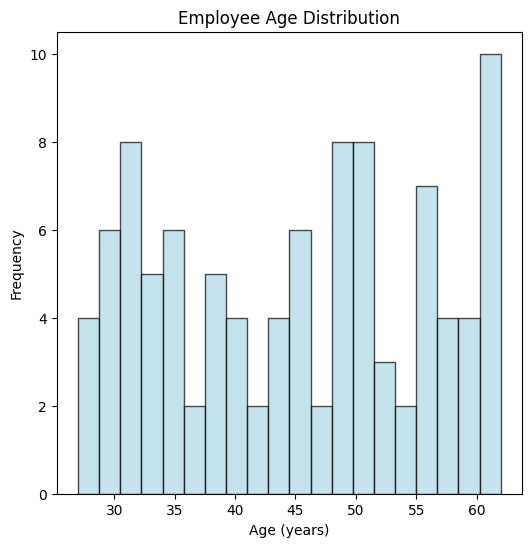

In [5]:
plt.figure(figsize=(6, 6))
plt.hist(df_colaboradores['idade'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Employee Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')


## Idade de funcionários por faixa etária

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '26-35'),
  Text(1, 0, '46-55'),
  Text(2, 0, '56-65'),
  Text(3, 0, '36-45'),
  Text(4, 0, '18-25'),
  Text(5, 0, '65+')])

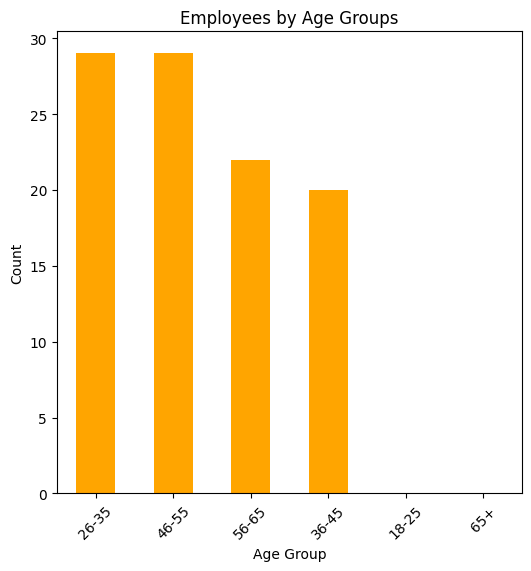

In [6]:
plt.figure(figsize=(6, 6))

age_groups = pd.cut(df_colaboradores['idade'], bins=[0, 25, 35, 45, 55, 65, 100], 
                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_groups.value_counts().plot(kind='bar', color='orange')
plt.title('Employees by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

## Resumo

In [8]:
# Summary statistics
print(f"\n📊 Summary Statistics:")
print(f"   - Average age: {df_colaboradores['idade'].mean():.1f} years")
print(f"   - Total unique employees: {len(df_colaboradores):,}")
print(f"   - Age range: {df_colaboradores['idade'].min()} - {df_colaboradores['idade'].max()} years")



📊 Summary Statistics:
   - Average age: 44.8 years
   - Total unique employees: 100
   - Age range: 27 - 62 years
